# Step 1 -  Load data and libraries

Based on the stack overflow survey's data, will be trying to answer the following questions:

* How Does the country Affects Salary/Job Satisfaction?
* Are non-degree respondents mode common in specific regions?
* How does tha sattisfaction compares accross regions?
* Is there any Gender bias on the salary on different regions?

If not possible to answers, at least get the insights to better understand the trends.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey-results-public.csv')

# Step 2 - Review data of interest

Based on the data dictionary, the following columns are the key to answer the above mentioned questiosn:
* Gender
* Country
* Salary
* CareerSatisfaction
* JobSatisfaction

More colunms may be used, but the focus of analysis will be on those 5.

In [2]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    df - a Cleaned and preped version of the dataset
    '''
    #Drop unneeded numeric columns
    df = df.drop(['Respondent', 'ExpectedSalary'], axis=1)
    #remove NA from Salary as it doesn't make sense to have it empty for the analysis.
    df = df.dropna(subset=['Salary'], axis=0)
    
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean(skipna=True)), inplace=True)
    df['Salary_bin']= pd.qcut(df['Salary'], 5, ['Tier 1','Tier 2','Tier 3','Tier 4','Tier 5'])
    df['Country_cat'] = df['Country'].astype('category').cat.codes
    return df
    

In [3]:
df = clean_data(df)   

Let's start by checking the releant fields:
* Country
* Salary
* Job Satisfaction

<AxesSubplot:>

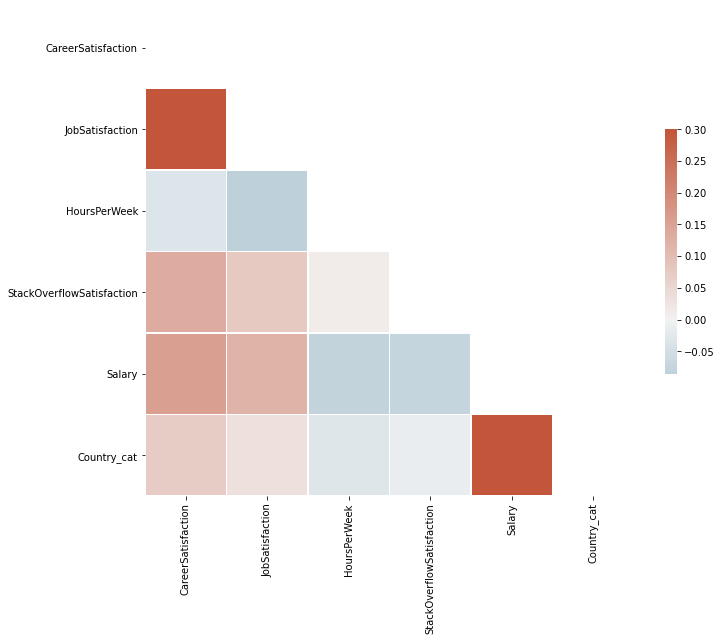

In [4]:
#convert Country columns into categorical

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Most columns are not highly correlated, so we will continue digging to understand how to approach the data analysis.

Let's plot Job Satisfaction accross some categories to better understand it.


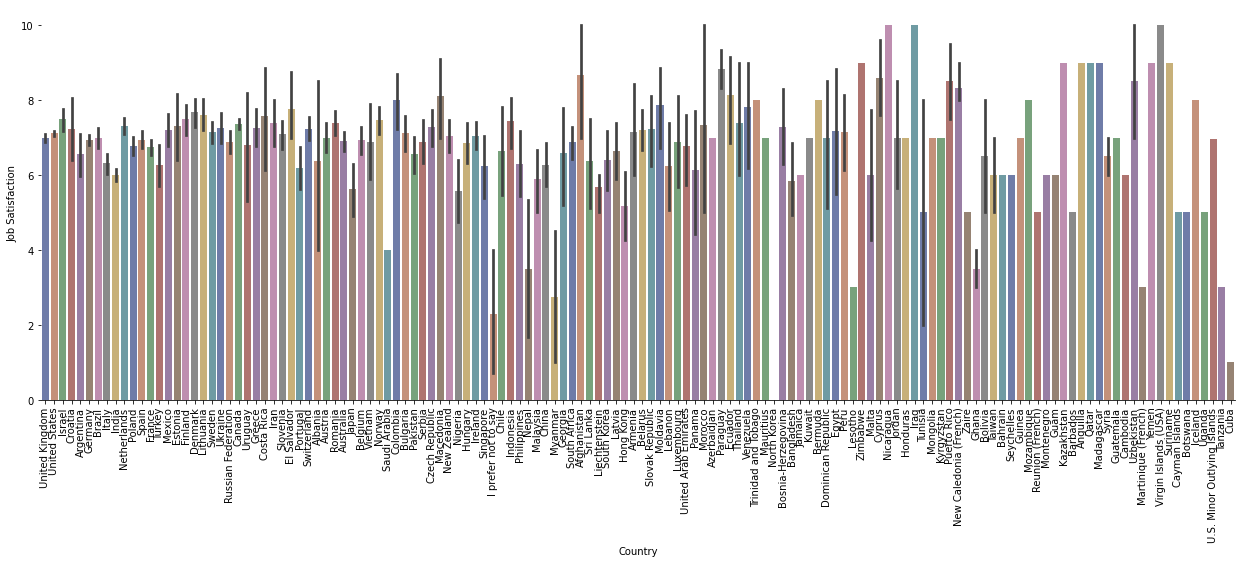

In [5]:
g = sns.catplot(
    data=df, kind="bar",
    x="Country", y="JobSatisfaction", 
    palette="dark", alpha=.6, height=6, aspect=3
)
g.despine(left=True)
g.set_axis_labels("Country", "Job Satisfaction")
g.set_xticklabels(rotation=90)


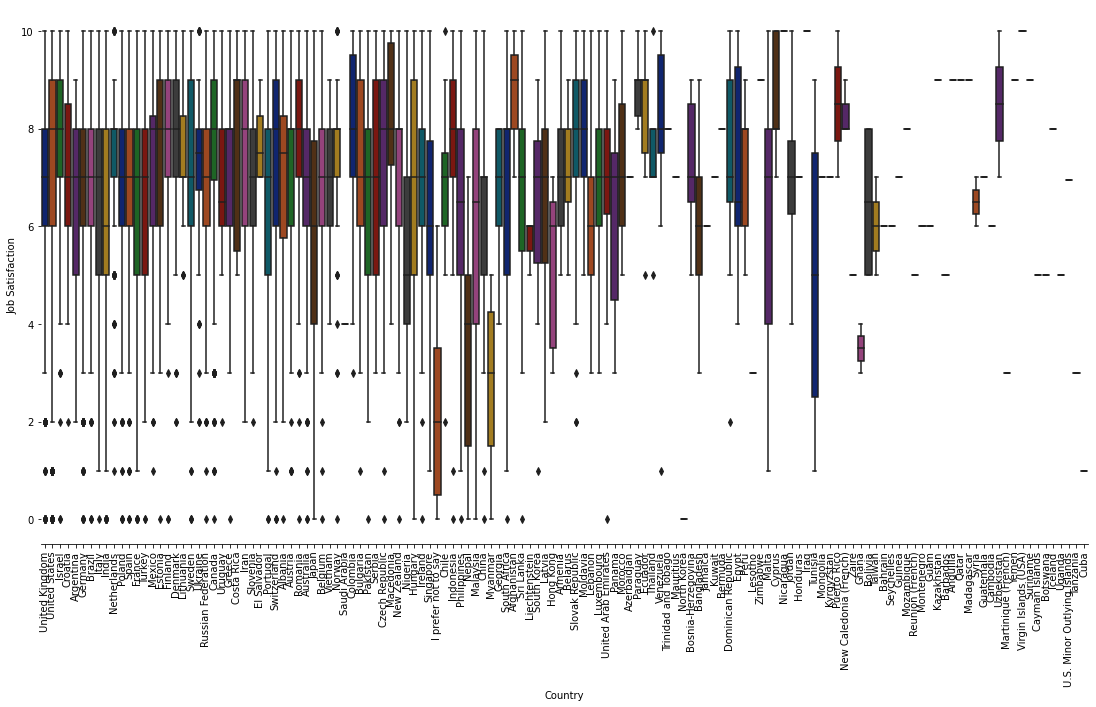

In [6]:
g = sns.catplot(
    data=df, kind="box",
    x="Country", y="JobSatisfaction", 
    palette="dark", height=8, aspect=2
)
g.despine(left=True)
g.set_axis_labels("Country", "Job Satisfaction")
g.set_xticklabels(rotation=90)

Not much information can be extracted directly from the above chart, other than a few countries where the the Job Satisfaction levels are low Myamar and Zaire, rest are either above the median or not enough data to consider tehm on the analysis.
so we will drill a bit down to better understand the data
let's look at the following information on the countries to see their satisfaction level.

* Carrer Satisfaction
* Formal Education
* Gender
* Salary

In [7]:
print(df['FormalEducation'].unique())

["Bachelor's degree" 'Professional degree' "Master's degree"
 "Some college/university study without earning a bachelor's degree"
 'Doctoral degree' 'Secondary school'
 'I never completed any formal education' 'Primary/elementary school'
 'I prefer not to answer']


In [8]:
print(df['Gender'].unique())

['Male' nan 'Female' 'Other' 'Female; Transgender' 'Gender non-conforming'
 'Male; Female' 'Female; Gender non-conforming' 'Male; Other'
 'Male; Gender non-conforming'
 'Male; Female; Transgender; Gender non-conforming; Other'
 'Male; Female; Other' 'Male; Transgender'
 'Female; Transgender; Gender non-conforming'
 'Transgender; Gender non-conforming' 'Male; Female; Transgender'
 'Transgender' 'Male; Gender non-conforming; Other'
 'Female; Transgender; Other' 'Male; Transgender; Other']


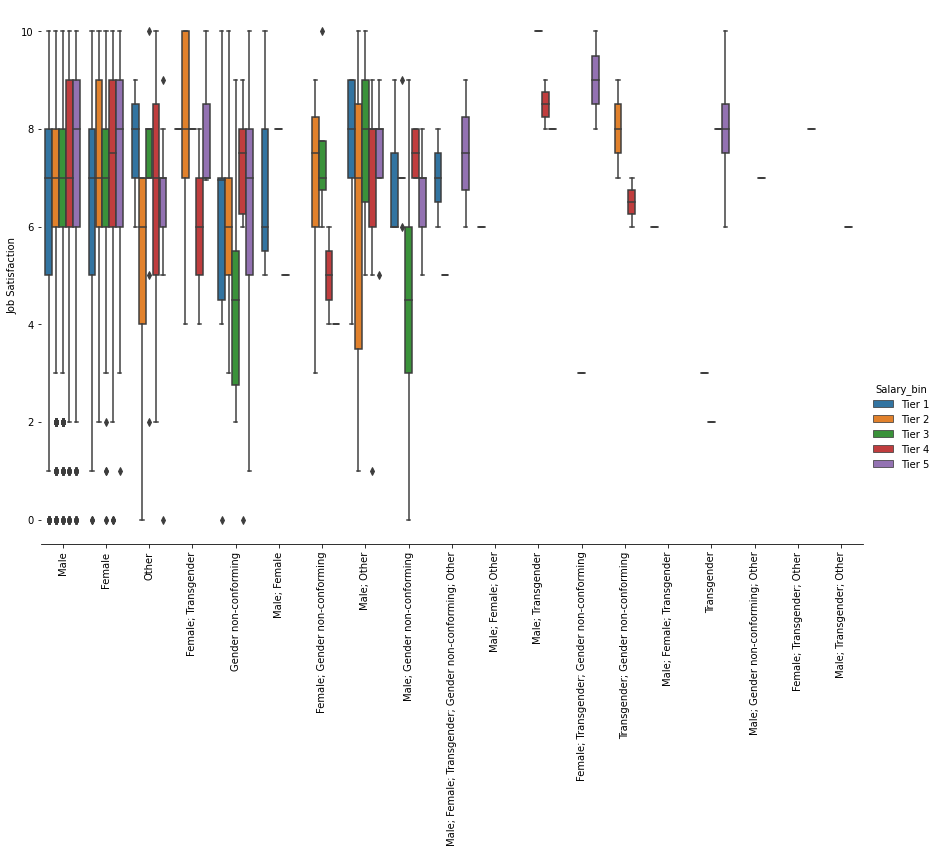

In [9]:
g = sns.catplot(x="Gender", 
            y="JobSatisfaction",
            hue="Salary_bin",
            kind="box", 
            height= 8,
            aspect = 1.5, 
            data=df)
g.despine(left=True)
g.set_axis_labels("", "Job Satisfaction")
g.set_xticklabels(rotation=90)

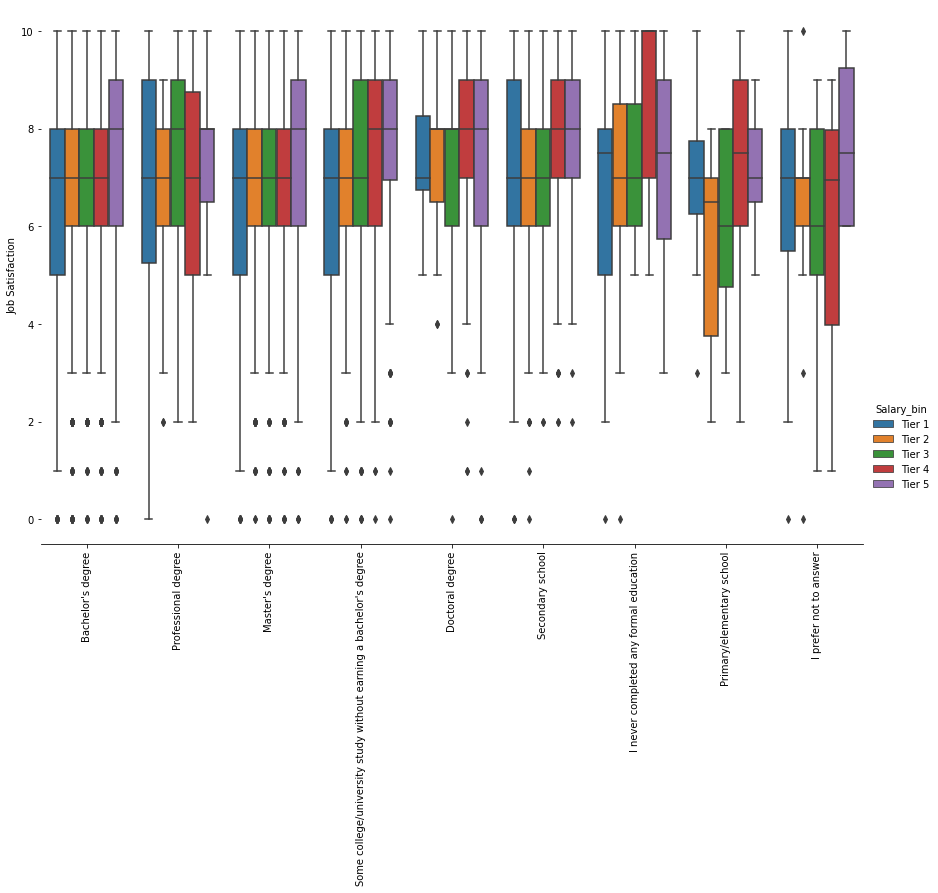

In [10]:
g = sns.catplot(x="FormalEducation", 
            y="JobSatisfaction",
            hue="Salary_bin",
            kind="box", 
            height= 8,
            aspect = 1.5, 
            data=df)
g.despine(left=True)
g.set_axis_labels("", "Job Satisfaction")
g.set_xticklabels(rotation=90)

For **Formal Education** the only out of trend values we can identify in primary/elementary school and prefer not to answer where the distribution doesn't follow the same trend.

For **Gender** Male and Female follows a very similar trend, but other values doesn't follow same pattern.

So far we can say, based on the data:
   * Other than a few execptions Country doesn't affect Job Satisfaction.
   * A direct relationship can be observed on Job Satisfaction for the different type of Formal education and the Salary, being the highest salaries the ones with higher Satisfaction
   * In Gender there is a trend accross Male and Female, but other categories doesn't follow and apparent rule.

Text(70, 44347.27684166866, 'Salary Mean')

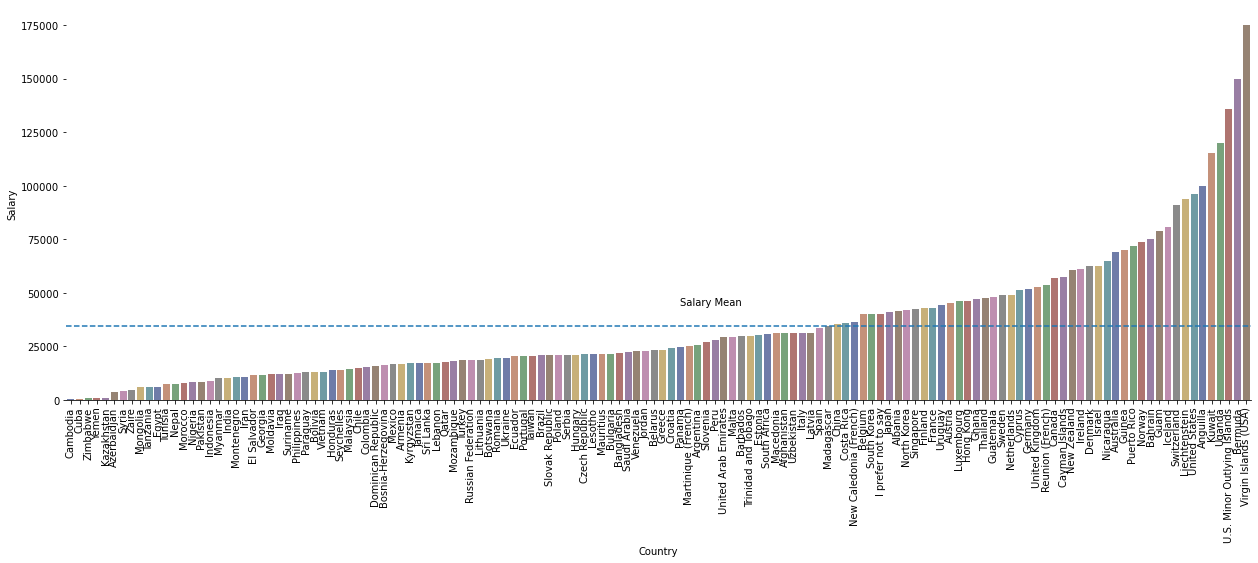

In [11]:
ordered_salary_country =  df[['Salary','Country']].groupby(df['Country']).mean()
ordered_salary_country['Country'] = ordered_salary_country.index
ordered_salary_country.sort_values(by=['Salary'], inplace=True)
salary_mean = ordered_salary_country['Salary'].mean()

g = sns.catplot(
    data=ordered_salary_country, kind="bar",
    x="Country", y="Salary", 
    palette="dark", alpha=.6, height=6, aspect=3
)
g.despine(left=True)
g.set_axis_labels("Country", "Salary")
g.set_xticklabels(rotation=90)

ax1 = g.axes[0]
ax1[0].axhline(salary_mean, ls='--')
ax1[0].text(70, ordered_salary_country['Salary'].mean() + 10000, "Salary Mean")

To plot:
* Amount of countries under de mean
* Top and Bottom 10 countries
* Salary Satisfaction combined chart.
* Gender/Salary/region combined plot

Let's revisit the questions and try to answer them based on our research:

* How Does the country Affects Salary/Job Satisfaction?
    - based on our research it doesn't affect the Job Satisfaction, but there is a significant different on the mean Salary.
* Are non-degree respondents mode common in specific regions?
    - Yes, in Sub-Saharan Africa
* How does tha sattisfaction compares accross regions?
    - It's very similar accross coutries
* Is there any Gender bias on the salary on different regions?
    - Pending

Since per country has proved to be too packer, we will summarize by region
For that we wil use the dataset on the following link https://www.kaggle.com/fernandol/countries-of-the-world/version/1


In [12]:
regions = pd.read_csv("countries of the world.csv")
regions['Country'] = regions['Country'].str.rstrip()

degree_region = pd.merge(df, regions)

In [14]:
#Number of respondent per country and degree
degree_region_aggr = degree_region.value_counts(subset=['FormalEducation','Region', 'Country']).reset_index(name="counts")

In [15]:
degree_region_aggr[degree_region_aggr['FormalEducation']=="I never completed any formal education"]

,FormalEducation,Region,Country,counts
156,I never completed any formal education,NORTHERN AMERICA,United States,8
183,I never completed any formal education,WESTERN EUROPE,France,6
188,I never completed any formal education,WESTERN EUROPE,United Kingdom,5
208,I never completed any formal education,NEAR EAST,Israel,4
238,I never completed any formal education,ASIA (EX. NEAR EAST),India,3
242,I never completed any formal education,NORTHERN AMERICA,Canada,3
248,I never completed any formal education,WESTERN EUROPE,Germany,3
295,I never completed any formal education,LATIN AMER. & CARIB,Mexico,2
300,I never completed any formal education,WESTERN EUROPE,Ireland,2
301,I never completed any formal education,EASTERN EUROPE,Bulgaria,2


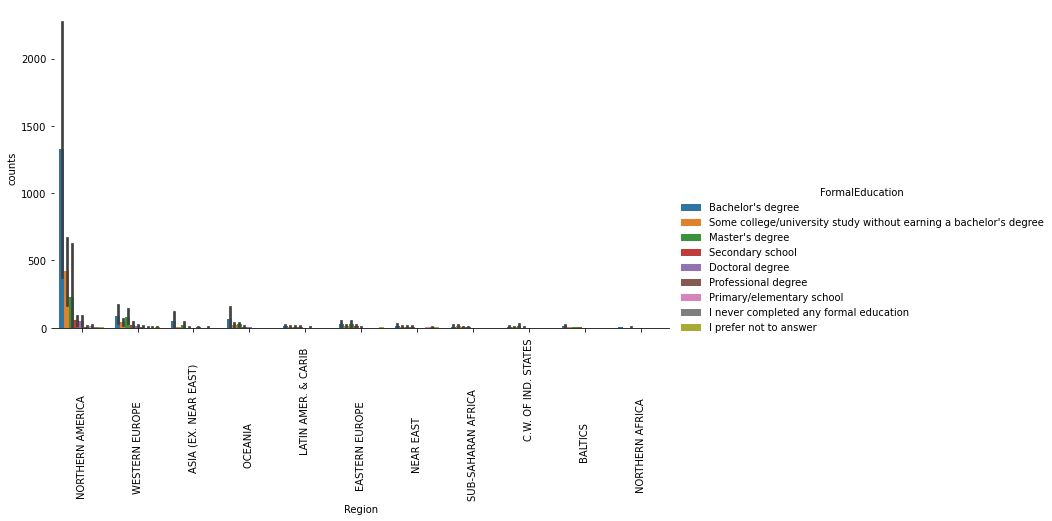

In [16]:
g = sns.catplot(x="Region", y="counts", hue="FormalEducation", kind="bar" , height=5, aspect=2, data=degree_region_aggr)
g.despine(left=True)
#g.set_axis_labels("Country", "Salary")
g.set_xticklabels(rotation=90)

Most people under the "I never completed any formal education" is present in all regions in very low numbers, but mostly on the **Western Europe** Region, let's review the countries

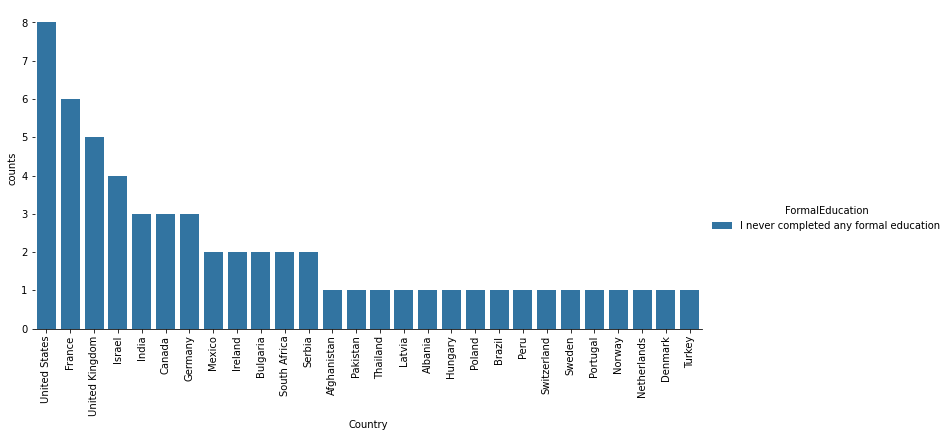

In [17]:
g = sns.catplot(x="Country", y="counts", hue="FormalEducation", kind="bar" , height=5, aspect=2, data=degree_region_aggr[degree_region_aggr['FormalEducation']=="I never completed any formal education"])
g.despine(left=True)
#g.set_axis_labels("Country", "Salary")
g.set_xticklabels(rotation=90)

In [30]:
gender_region = degree_region.groupby(['Gender','Region']).mean().reset_index() 

In [35]:
gender_region_aggr = gender_region[['Region', 'Gender', 'Salary']].sort_values(by=['Salary'],ascending=False)

In [36]:
gender_region_aggr

,Region,Gender,Salary
18,NORTHERN AMERICA,Female; Transgender; Other,126000.000000
45,WESTERN EUROPE,Male; Female; Transgender; Gender non-conformi...,118279.569892
14,NORTHERN AMERICA,Female; Transgender,110527.272727
68,NORTHERN AMERICA,Transgender,106833.333333
64,NORTHERN AMERICA,Other,102306.902098
...,...,...,...
63,NEAR EAST,Other,6199.460916
46,C.W. OF IND. STATES,Male; Gender non-conforming,4444.444444
37,ASIA (EX. NEAR EAST),Male; Female,3699.897225
6,NORTHERN AFRICA,Female,860.215054
